In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [163]:
import numpy as np
import random 
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

utils.reset_seeds()

In [27]:
utils.reset_seeds(42)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=3, activation='relu', name="layer_1"),
    layers.Dense(units=3, activation='relu', name="layer_2"),
    layers.Dense(units=1, activation='linear', name="layer_3"),
])

X = np.linspace(-1, 1, 1000)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.01, amsgrad=True, epsilon=0.01),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=500, verbose=0,
              callbacks=[CustomLogger(100)])


Epoch:   0 | Loss: 3.13654e-02
Epoch: 100 | Loss: 7.43632e-04
Epoch: 200 | Loss: 6.65950e-04
Epoch: 300 | Loss: 7.01679e-04
Epoch: 400 | Loss: 6.65148e-04


In [29]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(1, 3) dtype=float32, numpy=array([[ 1.0349307,  1.0728477, -1.4122535]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(3,) dtype=float32, numpy=array([-0.19989587, -0.5052555 , -0.45786384], dtype=float32)>,
 <tf.Variable 'layer_2/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.8225082 ,  0.20696324,  0.38630348],
        [ 0.5272228 ,  0.8774167 , -0.858816  ],
        [ 1.1133467 ,  0.03932923, -0.2640999 ]], dtype=float32)>,
 <tf.Variable 'layer_2/bias:0' shape=(3,) dtype=float32, numpy=array([-0.00965894, -0.3661812 ,  0.25681335], dtype=float32)>,
 <tf.Variable 'layer_3/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.8215462 ],
        [ 0.45250812],
        [-0.08347589]], dtype=float32)>,
 <tf.Variable 'layer_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.04586388], dtype=float32)>]

model contains 30 breaks
32/32 [==============================] - 0s 1ms/step


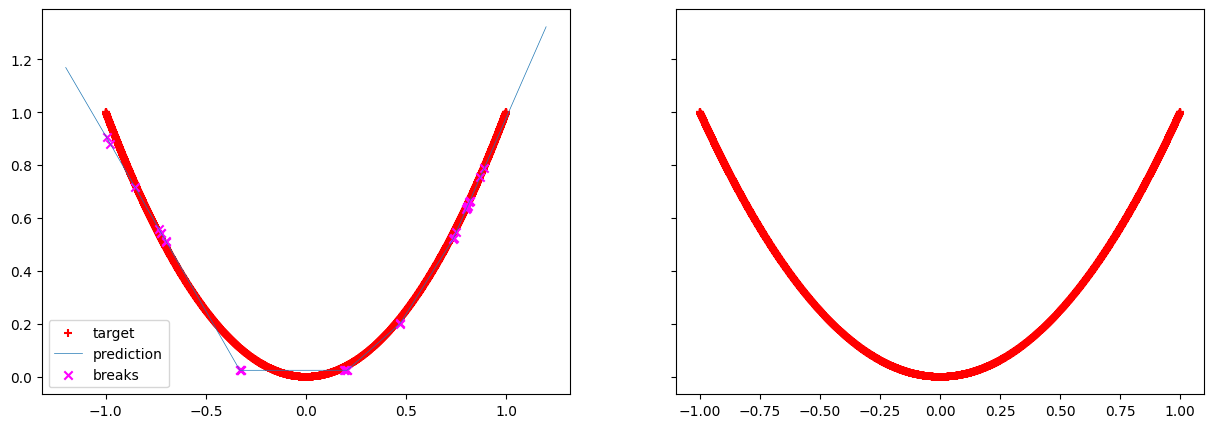

In [28]:
utils.joonista(model, X_valid, y_valid)

In [33]:
model.predict([[0.5]])[0][0]

1/1 [==============================] - 0s 43ms/step


0.23657566

In [50]:
layer_outputs = [layer.output for layer in model.layers]

ll_outputing_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

ll_outputing_model.predict([[0.5]])

1/1 [==============================] - 0s 82ms/step


[array([[0.3175695 , 0.03116834, 0.        ]], dtype=float32),
 array([[0.26797727, 0.        , 0.3527237 ]], dtype=float32),
 array([[0.23657566]], dtype=float32)]

In [51]:
for i in np.linspace(-1, 1, 100):
    assert model.predict([[i]], verbose=0)[0][0] == ll_outputing_model.predict([[i]], verbose=0)[2][0][0]

In [57]:
korraga = model.predict([np.linspace(-1,1,100)]).flatten()

4/4 [==============================] - 0s 2ms/step


In [66]:
ll_outputing_model.predict([np.linspace(-1,1, 100)])

4/4 [==============================] - 0s 2ms/step


[array([[0.        , 0.        , 0.9543897 ],
        [0.        , 0.        , 0.92585933],
        [0.        , 0.        , 0.897329  ],
        [0.        , 0.        , 0.8687986 ],
        [0.        , 0.        , 0.84026814],
        [0.        , 0.        , 0.8117379 ],
        [0.        , 0.        , 0.7832074 ],
        [0.        , 0.        , 0.75467706],
        [0.        , 0.        , 0.7261467 ],
        [0.        , 0.        , 0.69761634],
        [0.        , 0.        , 0.66908586],
        [0.        , 0.        , 0.6405556 ],
        [0.        , 0.        , 0.61202514],
        [0.        , 0.        , 0.5834948 ],
        [0.        , 0.        , 0.5549644 ],
        [0.        , 0.        , 0.52643406],
        [0.        , 0.        , 0.49790362],
        [0.        , 0.        , 0.46937332],
        [0.        , 0.        , 0.4408429 ],
        [0.        , 0.        , 0.4123126 ],
        [0.        , 0.        , 0.38378218],
        [0.        , 0.        , 0

In [132]:
X = np.linspace(-1,1, 100)
results = ll_outputing_model.predict([X])
different_paterns = set()

prev_patern = np.concatenate([np.nonzero(results[0][0])[0], np.nonzero(results[1][0])[0]])

b_points = []

n_layer = 3  # TODO mitte +3 vaid +n_per_layer
for l1, l2, point in zip(results[0][1:], results[1][1:], zip(X[1:], results[2][1:].flatten())):
    # print(l1)
    # print(l2)
    # print(out)
    patern = np.concatenate([np.nonzero(l1)[0], np.nonzero(l2)[0]+ n_layer])
    # print(prev_patern)
    # print(patern)
    #print((prev_patern == patern).all())
    if len(prev_patern) != len(patern) or not (prev_patern == patern).all():
        prev_patern = patern
        different_paterns.add(tuple(patern))
        b_points.append(point)
b_points


4/4 [==============================] - 0s 3ms/step


[(-0.9797979797979798, 0.8837541),
 (-0.31313131313131304, 0.024426157),
 (0.21212121212121215, 0.029125575),
 (0.4747474747474749, 0.20608164),
 (0.7373737373737375, 0.5237548)]

In [117]:
patern = [0, 0, 2]
prev_patern = [0, 1, 0, 2]

In [123]:
len(prev_patern) != len(patern) or 1/0
# or 
#not (prev_patern == patern).all()

True

In [69]:
print(l1)
print(l2)
print(out)

[0.        0.        0.9543897]
[1.0529077  0.         0.00475913]
[0.91047895]


In [102]:
np.nonzero(l1)[0], np.nonzero(l2)[0]

(array([2], dtype=int64), array([0, 2], dtype=int64))

In [95]:
l1

array([0.       , 0.       , 0.9543897], dtype=float32)

In [103]:
np.concatenate([np.nonzero(l1)[0], np.nonzero(l2)[0]+3])

array([2, 3, 5], dtype=int64)

In [89]:
((0,1), (1,)) in s

True

In [78]:
np.nonzero(l1 == 0)[0]

(0, 1)

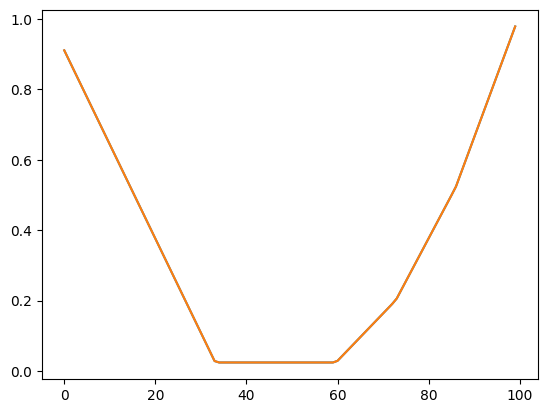

In [65]:
plt.plot(korraga)
plt.plot(eraldi)

In [7]:

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=1, activation='linear'),
])

X = np.linspace(-1, 1, 1000)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.01, amsgrad=True, epsilon=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=500, verbose=0,
              #validation_data=(X_valid, y_valid),
              callbacks=[CustomLogger(100)])

Epoch:   0 | Loss: 7.74591e-02
Epoch: 100 | Loss: 4.80170e-05
Epoch: 200 | Loss: 4.44097e-05
Epoch: 300 | Loss: 4.07877e-05
Epoch: 400 | Loss: 4.19993e-05


In [148]:
def breakpoint_finder(m, X, y):
    """Finds the places where the model's activation pattern changes and does

    :param m: model (keras sequential)
    :param X: input range to look for breakpoints
    :param y: right answer for inputs
    :return: breakpoints
    """    
    #X = np.linspace(-1,1, 100)
    layer_outputs = [layer.output for layer in m.layers]
    ll_outputing_model = tf.keras.Model(inputs=m.input, outputs=layer_outputs)
    
    results = ll_outputing_model.predict([X])
    different_paterns = set()

    prev_patern = np.concatenate([np.nonzero(results[0][0])[0], np.nonzero(results[1][0])[0]])

    b_points = []

    n_layer = 3  # TODO mitte +3 vaid +n_per_layer
    for l1, l2, point in zip(results[0][1:], results[1][1:], zip(X[1:], results[2][1:].flatten())):
        # print(l1)
        # print(l2)
        # print(out)
        patern = np.concatenate([np.nonzero(l1)[0], np.nonzero(l2)[0]+ n_layer])
        # print(prev_patern)
        # print(patern)
        #print((prev_patern == patern).all())
        if len(prev_patern) != len(patern) or not (prev_patern == patern).all():
            prev_patern = patern
            if tuple(patern) in different_paterns:
                print("EKSISTEERIVAD MITTEPIDEVAD PIIRKONNAD!!!!")
            different_paterns.add(tuple(patern))
            b_points.append((point, patern))
    return b_points

In [135]:
X_valid = np.linspace(-1,1,10000)
y_valid = X_valid**2
b_points = breakpoint_finder(model, X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step


model contains 8 breaks
32/32 [==============================] - 0s 2ms/step


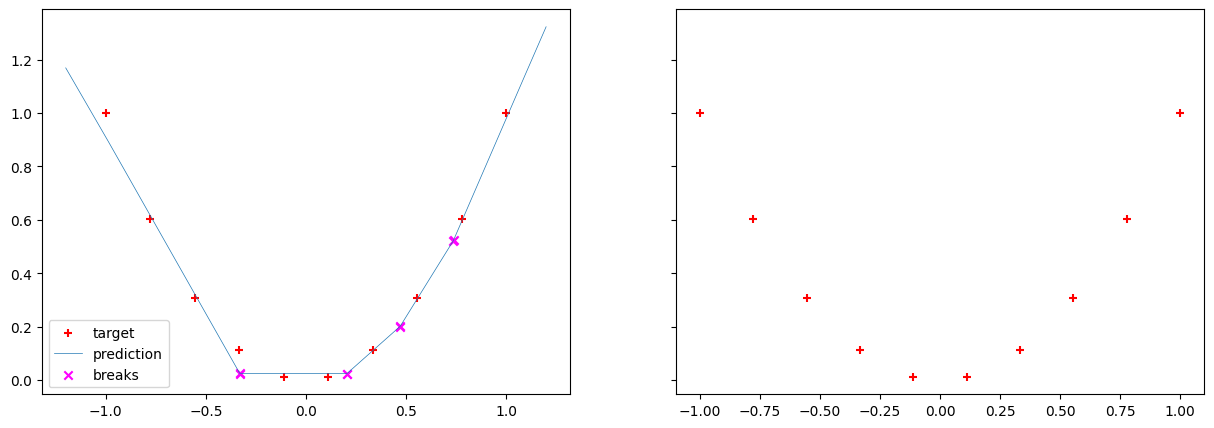

In [143]:
X = np.linspace(-1, 1, 1000)
y = X**2

utils.joonista(model, np.linspace(-1,1,10), np.linspace(-1,1,10)**2, max_delta=0.1)

In [149]:
breakpoint_finder(model, np.linspace(-10, 10, 100000), np.linspace(-10, 10, 100000)**2)

3125/3125 [==============================] - 5s 1ms/step


[((-9.99979999799998, 12.613759), array([2, 3, 4], dtype=int64)),
 ((-6.916969169691697, 8.554061), array([2, 3], dtype=int64)),
 ((-1.0127101271012702, 0.9272927), array([2, 3, 5], dtype=int64)),
 ((-0.33030330303303046, 0.02461593), array([2, 5], dtype=int64)),
 ((-0.3241032410324092, 0.024426157), array([5], dtype=int64)),
 ((0.19330193301933107, 0.024421053), array([0, 5], dtype=int64)),
 ((0.2045020450204511, 0.024051527), array([0, 3, 5], dtype=int64)),
 ((0.4711047110471114, 0.20168273), array([0, 1, 3, 5], dtype=int64)),
 ((0.7365073650736509, 0.5222556), array([0, 1, 3, 4, 5], dtype=int64)),
 ((1.1763117631176314, 1.283312), array([0, 1, 3, 4], dtype=int64))]

numpy.ndarray

4/4 [==============================] - 0s 2ms/step
model contains 7 breaks
32/32 [==============================] - 0s 2ms/step


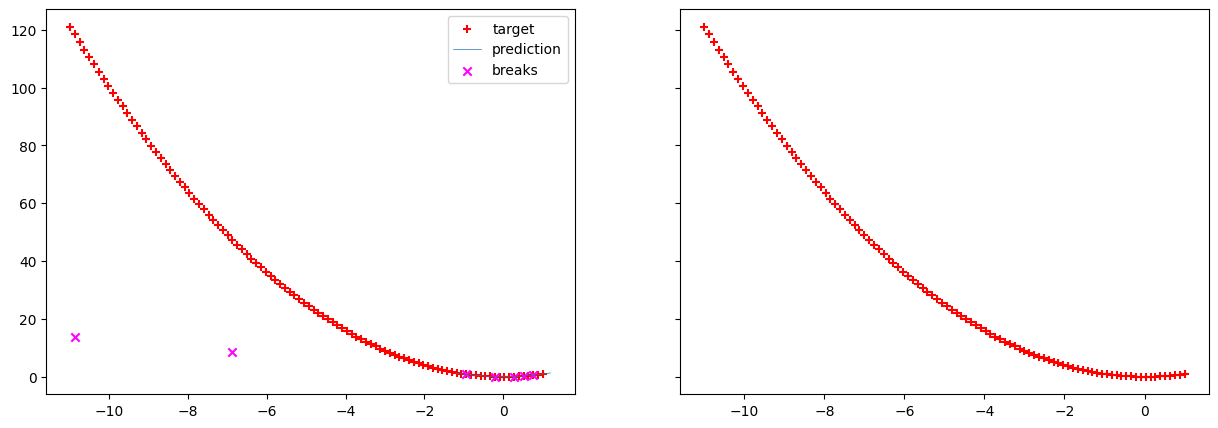

In [158]:
utils.joonista(model, np.linspace(-11,1,100), np.linspace(-11,1,100)**2, bpoint_fn=breakpoint_finder)

In [8]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(1, 5) dtype=float32, numpy=
 array([[ 1.0558331 ,  0.6457966 , -0.12649165,  1.041535  , -1.1060009 ]],
       dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(5,) dtype=float32, numpy=
 array([-0.45794454,  0.28017595, -0.1720213 , -0.01671708, -0.47581282],
       dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[ 0.7401836 ,  0.873693  ,  0.54281366,  0.37625682,  0.4149943 ],
        [-0.78099614,  0.49516675, -0.1203431 , -0.6633659 , -0.34238407],
        [-0.3542878 ,  0.02663727,  0.15518276,  0.15232348, -0.02768996],
        [-0.72054726,  0.58633995,  0.57437617, -0.5992774 ,  0.01004648],
        [ 0.91152734,  0.8322619 ,  0.02154643,  0.42211106,  0.18646623]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 0.14324597, -0.26348743, -0.49653035, -0.31824252, -0.15916665],
       dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(

In [162]:
utils.reset_seeds()

model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=5, activation='relu'),
        layers.Dense(units=5, activation='relu'),
        layers.Dense(units=1, activation='linear'),
    ])

X = np.linspace(-1, 1, 1000)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01, amsgrad=True, epsilon=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=2000 , verbose=0,
              #validation_data=(X_valid, y_valid),
              callbacks=[CustomLogger()])

Epoch:   0 | Loss: 7.74591e-02
Epoch: 100 | Loss: 4.80170e-05
Epoch: 200 | Loss: 4.44097e-05
Epoch: 300 | Loss: 4.07877e-05
Epoch: 400 | Loss: 4.19993e-05
Epoch: 500 | Loss: 4.31556e-05
Epoch: 600 | Loss: 4.20816e-05
Epoch: 700 | Loss: 4.42707e-05
Epoch: 800 | Loss: 4.32050e-05
Epoch: 900 | Loss: 4.25045e-05
Epoch: 1000 | Loss: 4.23066e-05
Epoch: 1100 | Loss: 4.42527e-05
Epoch: 1200 | Loss: 4.09554e-05
Epoch: 1300 | Loss: 4.10477e-05
Epoch: 1400 | Loss: 4.25578e-05
Epoch: 1500 | Loss: 4.04522e-05
Epoch: 1600 | Loss: 4.48487e-05
Epoch: 1700 | Loss: 4.14530e-05
Epoch: 1800 | Loss: 4.31263e-05
Epoch: 1900 | Loss: 4.17876e-05


1/1 [==============================] - 0s 60ms/step
model contains 9 breaks
32/32 [==============================] - 0s 1ms/step


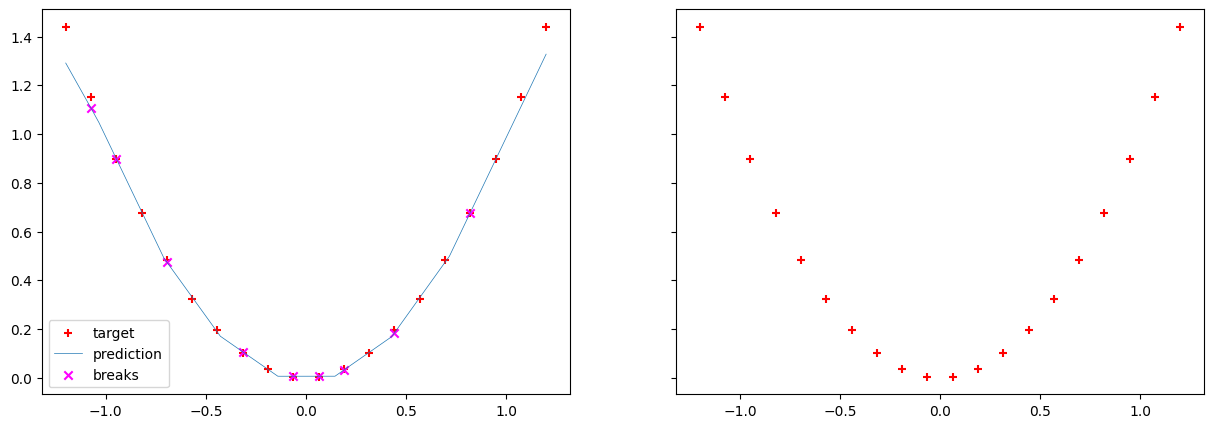

In [169]:
utils.joonista(model, np.linspace(-1.2, 1.2, 20), np.linspace(-1.2, 1.2, 20)**2)

In [179]:
model.layers[0].weights[0].shape[1]

5